# PCA and K-Means Clustering

In this notebook, we'll use PCA to reduce the dimensionality of the data and (hopefully) get better results than just using K-Means.

## Imports and housekeeping

In [31]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Setting for full table display
pd.set_option('display.max_columns', None)

In [32]:
# Import data
df = pd.read_csv('data/feature_engineered_data.csv')

# print the first few rows to confirm the data has been loaded correctly
df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,EducationOrdinalEncoded,Relationship_InRelationship,Relationship_NotInRelationship,Relationship_Undefined,ChildrenHome,RegencyInMonths,TotalSpent,DealSeeker,BuyerType_CatalogueBuyer,BuyerType_MixedBuyer,BuyerType_StoreBuyer,BuyerType_WebBuyer,VisitedWebsiteRecently,AcceptedOffer
0,58138,58,635,88,546,172,88,88,3,8,10,4,7,57,2,0,1,0,0,32,1617,1,1,0,0,0,1,1
1,46344,38,11,1,6,2,1,6,2,1,1,2,5,60,2,0,1,0,1,5,27,0,0,0,1,0,1,0
2,71613,26,426,49,127,111,21,42,1,8,2,10,4,49,2,1,0,0,0,16,776,0,0,0,1,0,1,0
3,26646,26,11,4,20,10,3,5,2,2,0,4,6,30,2,1,0,0,1,3,53,0,0,0,1,0,1,0
4,58293,94,173,43,118,46,27,15,5,5,3,6,5,33,5,1,0,0,1,11,422,1,0,0,1,0,1,0


In [33]:
# Copy data
df_use = df.copy()

## Standardise

In [34]:
# Scaling of continuous features
continuous_features = ['Income',
                       'Recency',
                       'MntWines',
                       'MntFruits',
                       'MntMeatProducts',
                       'MntFishProducts',
                       'MntSweetProducts',
                       'MntGoldProds',
                       'NumDealsPurchases',
                       'NumWebPurchases',
                       'NumCatalogPurchases',
                       'NumStorePurchases',
                       'NumWebVisitsMonth',
                       'Age',
                       'RegencyInMonths',
                       'TotalSpent']

# Separate binary features
continuous_data = df[continuous_features]
binary_ord_data = df.drop(continuous_features, axis=1)

In [35]:
continuous_data

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,RegencyInMonths,TotalSpent
0,58138,58,635,88,546,172,88,88,3,8,10,4,7,57,32,1617
1,46344,38,11,1,6,2,1,6,2,1,1,2,5,60,5,27
2,71613,26,426,49,127,111,21,42,1,8,2,10,4,49,16,776
3,26646,26,11,4,20,10,3,5,2,2,0,4,6,30,3,53
4,58293,94,173,43,118,46,27,15,5,5,3,6,5,33,11,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223,46,709,43,182,42,118,247,2,9,3,4,5,47,18,1341
2236,64014,56,406,0,30,0,0,8,7,8,2,5,7,68,3,444
2237,56981,91,908,48,217,32,12,24,1,2,3,13,6,33,11,1241
2238,69245,8,428,30,214,80,30,61,2,6,5,10,3,58,11,843


In [36]:
# Remove the specific product categories
remove_columns = ['MntWines',
                  'MntFruits',
                  'MntMeatProducts',
                  'MntFishProducts',
                  'MntSweetProducts',
                  'MntGoldProds']
continuous_data = continuous_data.drop(remove_columns, axis=1)

In [37]:

# Standardize continuous features using RobustScaler
scaler_continuous = RobustScaler()
scaled_continuous_data = scaler_continuous.fit_transform(continuous_data)

# Combined data
final_scaled_data = np.concatenate([scaled_continuous_data, binary_ord_data], axis=1)

In [38]:
final_scaled_data

array([[ 0.20272663,  0.18      ,  0.5       , ...,  0.        ,
         1.        ,  1.        ],
       [-0.15738451, -0.22      ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.61416445, -0.46      , -0.5       , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.16739947,  0.84      , -0.5       , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.54186132, -0.82      ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.04184605, -0.18      ,  0.5       , ...,  0.        ,
         1.        ,  1.        ]])

## PCA

In [39]:
# Apply PCA
n_components = final_scaled_data.shape[1]
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(final_scaled_data)

([<matplotlib.axis.XTick at 0x7f9a8e2788e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

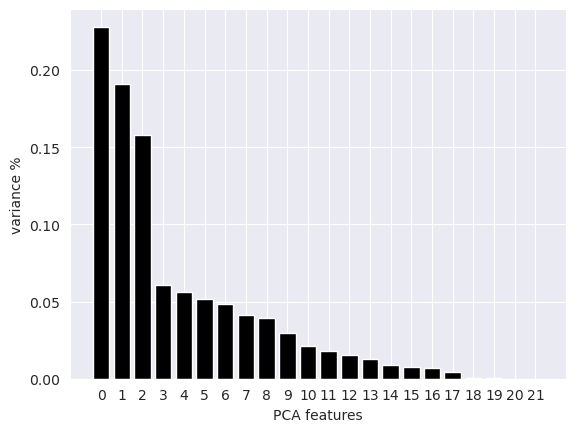

In [40]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

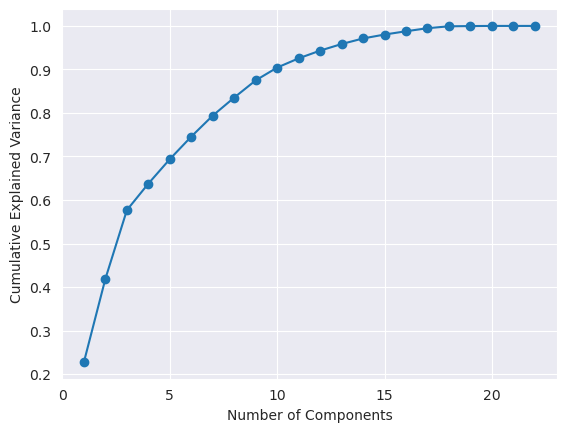

In [41]:
# Plot explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [42]:
# Get feature names
feature_names = [i for i in continuous_features if i not in remove_columns] + list(binary_ord_data.columns)

# Loop through each principal component and find the most important features
for i, component in enumerate(pca.components_[:n_components]):
    # Sort the indices of features based on their absolute weights in the component
    top_feature_indices = np.argsort(np.abs(component))[::-1]

    # Get the names of the top features
    top_feature_names = [feature_names[idx] for idx in top_feature_indices]

    print(f"Principal Component {i+1} - Explained Variance: {pca.explained_variance_ratio_[i]:.4f}")
    print("Top Features:", top_feature_names)
    print()

Principal Component 1 - Explained Variance: 0.2280
Top Features: ['EducationOrdinalEncoded', 'Income', 'NumCatalogPurchases', 'TotalSpent', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'ChildrenHome', 'Age', 'AcceptedOffer', 'BuyerType_CatalogueBuyer', 'NumDealsPurchases', 'BuyerType_StoreBuyer', 'DealSeeker', 'BuyerType_MixedBuyer', 'RegencyInMonths', 'VisitedWebsiteRecently', 'BuyerType_WebBuyer', 'Recency', 'Relationship_InRelationship', 'Relationship_NotInRelationship', 'Relationship_Undefined']

Principal Component 2 - Explained Variance: 0.1912
Top Features: ['EducationOrdinalEncoded', 'NumCatalogPurchases', 'Income', 'TotalSpent', 'NumWebVisitsMonth', 'NumDealsPurchases', 'NumStorePurchases', 'ChildrenHome', 'NumWebPurchases', 'DealSeeker', 'AcceptedOffer', 'Age', 'BuyerType_CatalogueBuyer', 'RegencyInMonths', 'BuyerType_MixedBuyer', 'Recency', 'BuyerType_WebBuyer', 'Relationship_NotInRelationship', 'Relationship_InRelationship', 'BuyerType_StoreBuyer', 'VisitedW

In [43]:
# Select the Number of Components
threshold = 0.80  # 80% of the variance will be maintained 
selected_components = np.argmax(cumulative_explained_variance >= threshold) + 1

In [44]:
print(selected_components)

8
